<a href="https://colab.research.google.com/github/joseazev/Wold_population/blob/main/Crescimento_da_popula%C3%A7%C3%A3o_Mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise do Crescimento da População Mundial

## Analise numero I

Importando bibliotecas para analise e impressão de gráfico

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/joseazev/Wold_population/main/world-population.csv', sep=',')
data.head()

,cca2,name,pop2022,pop2020,pop2050,pop2030,pop2015,pop2010,pop2000,pop1990,pop1980,pop1970,area,Density,GrowthRate,WorldPercentage,rank
0,CN,China,1448471.400,1439323.776,1402405.170,1464340.159,1406847.870,1368810.615,1290550.765,1176883.674,1000089.235,827601.394,9706961,149.2199,1.0029,0.1821,1
1,IN,India,1406631.776,1380004.385,1639176.033,1503642.322,1310152.403,1234281.170,1056575.549,873277.798,698952.844,555189.792,3287590,427.8611,1.0095,0.1768,2
2,US,United States,334805.269,331002.651,379419.102,349641.876,320878.310,309011.475,281710.909,252120.309,229476.354,209513.341,9372610,35.7217,1.0057,0.0421,3
3,ID,Indonesia,279134.505,273523.615,330904.664,299198.430,258383.256,241834.215,211513.823,181413.402,147447.836,114793.178,1904569,146.5605,1.0100,0.0351,4
4,PK,Pakistan,229488.994,220892.340,338013.196,262958.794,199426.964,179424.641,142343.578,107647.921,78054.343,58142.060,881912,260.2176,1.0190,0.0289,5


 Os dados originais estão em lingua inglesa, para melhor entendimento as colunas foram traduzidas para o português.

 ```
 Também é uma demonstração que eu sei manipular os nomes das colunas
 ```

In [3]:
colunas = ['sigla','nome','pop2022','pop2020','pop2050','pop2030','pop2015',
           'pop2010','pop2000','pop1990','pop1980','pop1970','territorio',
           'densidade','taxa_de_crescimento','porcentagem_muldial',
           'classificacao']                                                     # Tradução das colunas
data.columns = colunas                                                          # Agregação de novos nomes

In [4]:
data.head()

,sigla,nome,pop2022,pop2020,pop2050,pop2030,pop2015,pop2010,pop2000,pop1990,pop1980,pop1970,territorio,densidade,taxa_de_crescimento,porcentagem_muldial,classificacao
0,CN,China,1448471.400,1439323.776,1402405.170,1464340.159,1406847.870,1368810.615,1290550.765,1176883.674,1000089.235,827601.394,9706961,149.2199,1.0029,0.1821,1
1,IN,India,1406631.776,1380004.385,1639176.033,1503642.322,1310152.403,1234281.170,1056575.549,873277.798,698952.844,555189.792,3287590,427.8611,1.0095,0.1768,2
2,US,United States,334805.269,331002.651,379419.102,349641.876,320878.310,309011.475,281710.909,252120.309,229476.354,209513.341,9372610,35.7217,1.0057,0.0421,3
3,ID,Indonesia,279134.505,273523.615,330904.664,299198.430,258383.256,241834.215,211513.823,181413.402,147447.836,114793.178,1904569,146.5605,1.0100,0.0351,4
4,PK,Pakistan,229488.994,220892.340,338013.196,262958.794,199426.964,179424.641,142343.578,107647.921,78054.343,58142.060,881912,260.2176,1.0190,0.0289,5


In [5]:
quantidade_paises = data['nome'].count()                                        # Quantidade de paíse que fizeram parte do estudo
colunas = data.columns                                                          # Capitura de colunas
contagens = len(colunas[2:-5])                                                  # Capiturando as colunas com os estudos
print(f'Foram contado a população de um total de {quantidade_paises}')          # Apresentação de quantidade de países
print(f'As contagens foram realizada em {contagens} anos ao entre 1970 e 2022') # Aprese o resultado da quantidade de anos de contagem

Foram contado a população de um total de 232
As contagens foram realizada em 10 anos ao entre 1970 e 2022


In [10]:
paises = data['nome']                                                           # Capitura os nomes dos países
media_paises = []                                                               #Cria uma lista que será adicionado o nome do pais e a media de crescimento.

for pais in paises:                                                             # Inicio do loop para percorrer os paises do dataframe
  
  info_pais = data[data['nome'] == pais]                                        # Recolhe a linha referente ao país
  info_pais = info_pais.T                                                       # Transforma as colunas em linha
  info_pais.drop(['sigla','nome','territorio','densidade','taxa_de_crescimento',
                  'porcentagem_muldial','classificacao'], inplace=True)         # Descarta linhas essedentes
  info_pais.columns = ['populacao']                                             # Insere um nome para a coluna value
  crescimento = []                                                              # Cria uma lista vazia 

  for i in range(len(info_pais)):                                               # Percorre todas as linhas com a contagem da população

    if i+1 == len(info_pais):                                                   # Faz o teste para ver se está na ultima linha
      crescimento.append(0)                                                     # Caso positivo não a conta a ser feita adiciona zero 
      break                                                                     # Finaliza o for
    
    crescimento.append(info_pais.populacao[i] - info_pais.populacao[i+1])       # calcula a diferença entre as contagens dos anos
    
  info_pais['crescimento'] = crescimento                                        # Adiciona a lista com o resultado de crescimento
  media = round(
      sum(info_pais['crescimento'])/(2022 - 1970),2)                            # Calcula a media dos crescimentos arredondando o para duas casas decimais               
  media_paises.append([pais,media])                                             # Insere o país e o resultado da média  



In [11]:
media_paises = pd.DataFrame(media_paises, 
                            columns=['pais','media_de_crescimento'])            # atribui nome a colunas
media_paises.sort_values(by=['media_de_crescimento'],ascending=False, 
                         ignore_index=True, inplace=True)                       # Ordena de forma decrescente os valores das médias

media_paises.index.name = 'Id'                                                  # Atribuir um nome para a couluna de index
media_paises

,pais,media_de_crescimento
Id,,
0,India,16373.88
1,China,11939.81
2,Pakistan,3295.13
3,Indonesia,3160.41
4,Nigeria,3091.63
...,...,...
227,Georgia,-14.32
228,Hungary,-14.61
229,Romania,-29.18


### Os 10 países com o maiores médias anuais de crescimento populacional 

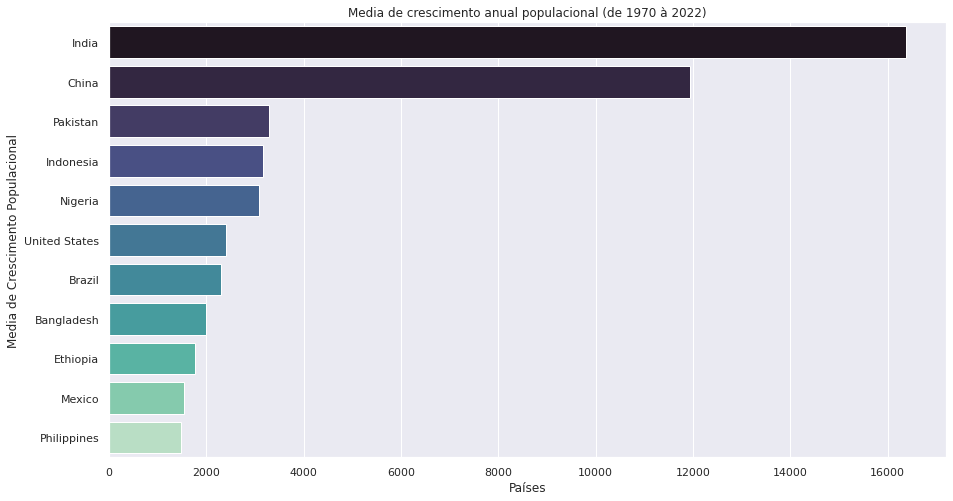

In [32]:
sns.set(rc = {'figure.figsize':(15,8)})                                         # Modificando o as dimenções do plot 
sns.barplot(x='media_de_crescimento',
            y='pais',
            data=media_paises.query("Id in [0,1,2,3,4,5,6,7,8,9,10]"),
            palette="mako",
            orient='h')                                                         # Criação de grafico de barra.
plt.title('Media de crescimento anual populacional (de 1970 à 2022)')           # Agregação de um titulo
plt.xlabel('Países')                                                            # Etiqueta do eixo x 
plt.ylabel('Media de Crescimento Populacional')                                 # Etiqueta do Eixo y
plt.show()

### Os 10 países com o menores médias anuais de crescimento populacional 

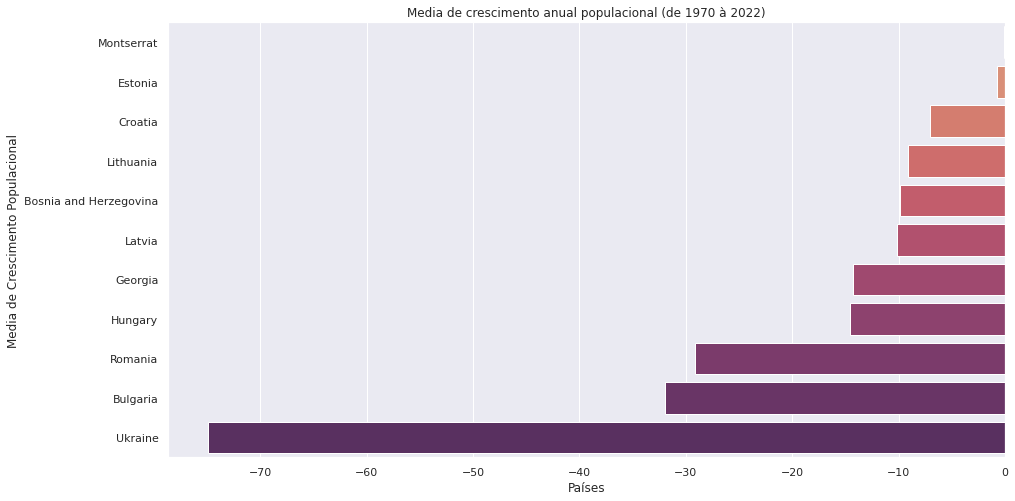

In [31]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x='media_de_crescimento',
            y='pais',
            data=media_paises.query("Id in [221,222,223,224,225,226,227,228,229,230,231]"),
            palette="flare")
plt.title('Media de crescimento anual populacional (de 1970 à 2022)')
plt.xlabel('Países')
plt.ylabel('Media de Crescimento Populacional')
plt.show()